**Koronavirüs Veri Analizi**

Bu projedede koronavirüs salgını ile ilgili günlük vaka sayısı, günlük ölüm sayısı, aşılama sayısı vb. birçok bilgiler bulunmaktadır. Beş adet analiz yapılmıştır.

In [1]:
#analizde kullanılacak olan kütüphaneleri import etme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#verisetini okuma işlemi
df = pd.read_csv("covid_data.csv", engine = 'python')

In [3]:
#verisetindeki toplam (satır,sütun) sayısı
df.shape

(232799, 67)

In [4]:
#veritürlerinin, boş olmayan değerlerin sayısının ve sütun isimlerinin genel bir özeti
#0'dan 232798'e kadar numaralandırılmış 232799 girilen değer vardır
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232799 entries, 0 to 232798
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    232799 non-null  object 
 1   continent                                   219658 non-null  object 
 2   location                                    232799 non-null  object 
 3   date                                        232799 non-null  object 
 4   total_cases                                 219693 non-null  float64
 5   new_cases                                   219395 non-null  float64
 6   new_cases_smoothed                          218199 non-null  float64
 7   total_deaths                                200445 non-null  float64
 8   new_deaths                                  200370 non-null  float64
 9   new_deaths_smoothed                         199190 non-null  float64
 

In [5]:
#df'in ilk beş satırı
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24.02.2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25.02.2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26.02.2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27.02.2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28.02.2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
#df'in son 5 satırı
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
232794,ZWE,Africa,Zimbabwe,1.11.2022,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232795,ZWE,Africa,Zimbabwe,2.11.2022,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232796,ZWE,Africa,Zimbabwe,3.11.2022,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232797,ZWE,Africa,Zimbabwe,4.11.2022,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232798,ZWE,Africa,Zimbabwe,5.11.2022,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [8]:
#object veri tipinde olan 'date' datetime veri tipi olarak değiştirildi
df["date"]= pd.to_datetime(df["date"])

In [9]:
df["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 232799 entries, 0 to 232798
Series name: date
Non-Null Count   Dtype         
--------------   -----         
232799 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.8 MB


In [10]:
#verisetindeki tüm sütunların isimleri
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [11]:
#seçilen sütunlar
selected_column=["continent","location","date","total_cases","new_cases","total_cases_per_million",
                 "total_deaths_per_million","total_tests", "new_tests","people_vaccinated","gdp_per_capita",
                 "hospital_beds_per_thousand","total_deaths","population"]

In [12]:
#selected_column içerisinde olmayan sütunların silinmesi
for i in df.columns:
    if i not in selected_column:
        df.drop(i,axis=1,inplace=True)

In [13]:
#sütunların istatiksel özeti
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,219693.0,4.532789e+06,2.828932e+07,1.000,4548.0000,50530.000,5.336100e+05,6.323342e+08
new_cases,219395.0,1.229695e+04,8.483903e+04,0.000,0.0000,52.000,9.430000e+02,4.081969e+06
total_deaths,200445.0,7.466858e+04,3.835594e+05,1.000,114.0000,1199.000,9.903000e+03,6.599916e+06
total_cases_per_million,218690.0,6.139802e+04,1.084110e+05,0.001,1105.4845,10471.054,7.365130e+04,6.726086e+05
total_deaths_per_million,199455.0,6.950810e+02,9.796492e+02,0.000,29.5875,215.239,1.029172e+03,6.375084e+03
total_tests,79387.0,2.110457e+07,8.409869e+07,0.000,364654.0000,2067330.000,1.024845e+07,9.214000e+09
new_tests,75403.0,6.728541e+04,2.477340e+05,1.000,2244.0000,8783.000,3.722900e+04,3.585563e+07
people_vaccinated,63675.0,1.324023e+08,5.428460e+08,0.000,703665.0000,4569063.000,2.877276e+07,5.438137e+09
gdp_per_capita,187552.0,1.954058e+04,2.053516e+04,661.240,4449.8980,12951.839,2.793690e+04,1.169356e+05
hospital_beds_per_thousand,167029.0,3.088716e+00,2.552031e+00,0.100,1.3000,2.500,4.200000e+00,1.380000e+01


In [14]:
#sayısal olmayan tüm sütunların istatiksel özeti
df.describe(include=['O'])

,continent,location
count,219658,232799
unique,6,248
top,Europe,Argentina
freq,53285,1040


In [15]:
#null değerlerin azalan sayıda sıralanışı
print(df.isnull().sum().sort_values(ascending=False))

people_vaccinated             169124
new_tests                     157396
total_tests                   153412
hospital_beds_per_thousand     65770
gdp_per_capita                 45247
total_deaths_per_million       33344
total_deaths                   32354
total_cases_per_million        14109
new_cases                      13404
continent                      13141
total_cases                    13106
population                      1003
location                           0
date                               0
dtype: int64


In [16]:
#hiç ölüm sayısı girilmemiş ülke olduğundan null değerleri 0 ile doldurdum
#death_rate analizinde ölüm sayısı hiç girilmemiş ülkenin null değerlerine ortalama yazıldığında sonuç etkileniyor
df["total_deaths"].fillna(0,inplace=True)
df["total_deaths"]

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
232794    5606.0
232795    5606.0
232796    5606.0
232797    5606.0
232798    5606.0
Name: total_deaths, Length: 232799, dtype: float64

In [17]:
#null değer sayısı yüksek olduğundan ve aşı sayısı ile ilgili analizde hiç aşı girdisi olmayan ülkeler 
#olduğundan analizin daha doğru olması açısından null değerleri 0 ile doldurdum.
df["people_vaccinated"].fillna(0,inplace=True)
df["people_vaccinated"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
232794    0.0
232795    0.0
232796    0.0
232797    0.0
232798    0.0
Name: people_vaccinated, Length: 232799, dtype: float64

In [18]:
#seçilen sütundaki null değerlerin ortalama ile doldurulması
float64_type=["total_cases","new_cases","total_cases_per_million","total_deaths_per_million",
              "total_tests","new_tests","gdp_per_capita","hospital_beds_per_thousand","population"]
for i  in float64_type:
    df[i]=df[i].fillna(df[i].mean())

In [19]:
print(df.isnull().sum().sort_values(ascending=False))

continent                     13141
location                          0
date                              0
total_cases                       0
new_cases                         0
total_deaths                      0
total_cases_per_million           0
total_deaths_per_million          0
total_tests                       0
new_tests                         0
people_vaccinated                 0
gdp_per_capita                    0
hospital_beds_per_thousand        0
population                        0
dtype: int64


Verisetinde location sütununda ülke adları olması gerekirken bunun yerine World girdisi bulunmaktadır. Buna karşılık herhangi bir kıta ismi olmayacağından null değerler vardır, yapacağım analizler ülkelere göre olacağından kıta ismi olmayan satırları kaldırdım.

In [20]:
#kıta ismi olmayan satırları silme
df.dropna(subset=['continent'], inplace=True) 

In [21]:
#null değerlerin kontrolu
df.isnull().sum().sum()

0

**En yüksek vaka sayısına sahip ilk 11 ülke**

In [23]:
top_11_countries_highest_total_cases=df.groupby("location", as_index=False).max("date").sort_values("total_cases", ascending = False).head(11)

top_11_countries_highest_total_cases

,location,total_cases,new_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,new_tests,people_vaccinated,gdp_per_capita,hospital_beds_per_thousand,population
221,United States,97734261.0,1355234.0,1072582.0,288906.863,3170.601000,912769124.0,3.201706e+06,2.664019e+08,54225.446,2.77,3.382899e+08
93,India,44660579.0,414188.0,530500.0,31513.848,695.081045,858526354.0,3.585563e+07,1.026901e+09,6426.674,0.53,1.417173e+09
71,France,36982388.0,502507.0,157346.0,545358.383,2320.293000,278234000.0,2.222575e+06,5.459428e+07,38605.671,5.98,6.781300e+07
76,Germany,35823771.0,527487.0,154535.0,429697.010,1853.608000,131286804.0,6.728541e+04,6.480632e+07,45229.245,8.00,8.336984e+07
27,Brazil,34849063.0,287149.0,688332.0,161852.658,3196.883000,70923215.0,2.920329e+06,1.873975e+08,14103.452,2.20,2.153135e+08
194,South Korea,25838239.0,621317.0,29372.0,498655.526,695.081045,100269452.0,1.154325e+06,4.512197e+07,35938.374,12.27,5.181581e+07
220,United Kingdom,23930041.0,225672.0,209947.0,354472.199,3109.914000,503270347.0,2.224245e+06,5.381349e+07,39753.244,2.54,6.750894e+07
100,Italy,23642011.0,228123.0,179436.0,400457.713,3039.358000,224876148.0,1.481349e+06,5.085021e+07,35220.084,3.18,5.903747e+07
102,Japan,22635975.0,260999.0,47087.0,182619.325,695.081045,53504941.0,1.329376e+06,1.042843e+08,39002.223,13.05,1.239517e+08
171,Russia,21154149.0,202211.0,382644.0,146179.703,2644.152000,295244836.0,1.118115e+06,8.592624e+07,24765.954,8.05,1.447133e+08


<AxesSubplot: title={'center': 'en yüksek toplam vakaya sahip 11 ülke'}, xlabel='location', ylabel='total_cases'>

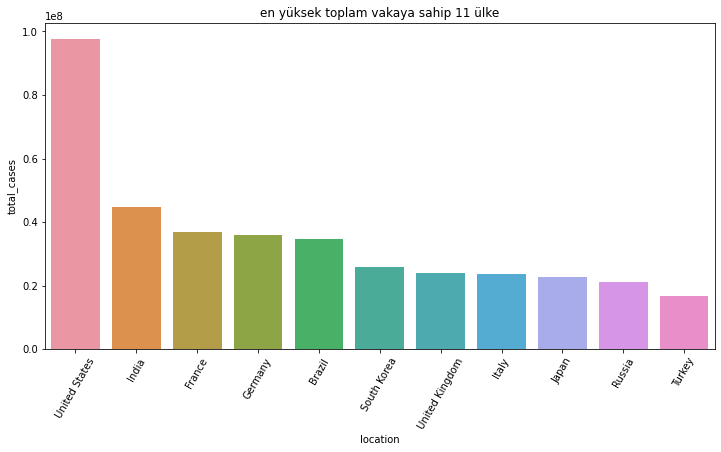

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=60)
plt.title("en yüksek toplam vakaya sahip 11 ülke")
sns.barplot(data=top_11_countries_highest_total_cases, x="location", y="total_cases")

**En yüksek vaka sayısına sahip ülkelerin günlük ortalama vaka sayısı**

In [25]:
df_USA = df[df["location"] == "United States"]
df_USA["location"].value_counts()

United States    1019
Name: location, dtype: int64

In [26]:
print(df_USA["total_cases"][219762])
USA_int_mean_case=97734261//1019
print(USA_int_mean_case)

97734261.0
95911


In [27]:
df_IND=df[df["location"]=="India"]
df_IND["location"].value_counts()

India    1011
Name: location, dtype: int64

In [28]:
print(df_IND["total_cases"][95872])
IND_int_mean_case=44660579//1011
print(IND_int_mean_case)

44660579.0
44174


In [29]:
df_FRA = df[df["location"] == "France"]
df_FRA["location"].value_counts()

France    1017
Name: location, dtype: int64

In [30]:
print(df_FRA["total_cases"][73934])
FRA_int_mean_case=36982388//1017
print(FRA_int_mean_case)

36982388.0
36364


In [31]:
df_DEU=df[df["location"] == "Germany"]
df_DEU["location"].value_counts()

Germany    1014
Name: location, dtype: int64

In [32]:
print(df_DEU["total_cases"][78831])
DEU_int_mean_case=35823771//1014
print(DEU_int_mean_case)

35823771.0
35329


In [33]:
df_BRA=df[df["location"]=="Brazil"]
df_BRA["location"].value_counts()

Brazil    984
Name: location, dtype: int64

In [34]:
print(df_BRA["total_cases"][29392])
BRA_int_mean_case=34849063//984
print(BRA_int_mean_case)

34849063.0
35415


In [35]:
df_KOR=df[df["location"]=="South Korea"]
df_KOR["location"].value_counts()

South Korea    1019
Name: location, dtype: int64

In [36]:
print(df_KOR["total_cases"][195009])
KOR_int_mean_case=25838239//1019
print(KOR_int_mean_case)

25838239.0
25356


In [37]:
df_GBR=df[df["location"] == "United Kingdom"]
df_GBR["location"].value_counts()

United Kingdom    1011
Name: location, dtype: int64

In [38]:
print(df_GBR["total_cases"][218743])
GBR_int_mean_case=23930041//1011
print(GBR_int_mean_case)

23930041.0
23669


In [39]:
df_ITA=df[df["location"] == "Italy"]
df_ITA["location"].value_counts()

Italy    1010
Name: location, dtype: int64

In [40]:
print(df_ITA["total_cases"][103773])
ITA_int_mean_case=23642011//1010
print(ITA_int_mean_case)

23642011.0
23407


In [41]:
df_JPN = df[df["location"] == "Japan"]
df_JPN["location"].value_counts()

Japan    1019
Name: location, dtype: int64

In [42]:
print(df_JPN["total_cases"][105762])
JPN_int_mean_case=22635975//1019
print(JPN_int_mean_case)

22635975.0
22213


In [43]:
df_RUS = df[df["location"] == "Russia"]
df_RUS["location"].value_counts()

Russia    1010
Name: location, dtype: int64

In [44]:
print(df_RUS["total_cases"][172701])
RUS_int_mean_case=21154149//1010
print(RUS_int_mean_case)

21154149.0
20944


In [45]:
df_TUR = df[df["location"] == "Turkey"]
df_TUR["location"].value_counts()

Turkey    970
Name: location, dtype: int64

In [46]:
print(df_TUR["total_cases"][212717])
TUR_int_mean_case=16919638//970
print(TUR_int_mean_case)

16919638.0
17442


* Numpy kullanarak ülke isimlerinden ve günlük ortalama vaka sayısını gösteren bir tablo oluşturuldu.

In [47]:
data=np.array([["ABD",USA_int_mean_case],["Hindistan",IND_int_mean_case],["Fransa",FRA_int_mean_case],
               ["Almanya",DEU_int_mean_case],["Brezilya",BRA_int_mean_case],["Güney Kore",KOR_int_mean_case],
               ["Birleşik Krallık",GBR_int_mean_case],["İtalya",ITA_int_mean_case],["Japonya",JPN_int_mean_case],
               ["Rusya",RUS_int_mean_case],["Türkiye",TUR_int_mean_case]])
columns_name=["ulke_ismi","gunluk_ortalama_vaka_sayisi"]
mean_data = pd.DataFrame(data=data, columns=columns_name)
mean_data

,ulke_ismi,gunluk_ortalama_vaka_sayisi
0,ABD,95911
1,Hindistan,44174
2,Fransa,36364
3,Almanya,35329
4,Brezilya,35415
5,Güney Kore,25356
6,Birleşik Krallık,23669
7,İtalya,23407
8,Japonya,22213
9,Rusya,20944


In [48]:
mean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ulke_ismi                    11 non-null     object
 1   gunluk_ortalama_vaka_sayisi  11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


* mean_data içerisindeki sütunlar object veri tipi olarak alındığından tablo çizmek için veri tipleri değiştirildi.

In [49]:
mean_data["gunluk_ortalama_vaka_sayisi"] = mean_data["gunluk_ortalama_vaka_sayisi"].astype(int) 
mean_data["ulke_ismi"] = mean_data["ulke_ismi"].astype(str) 

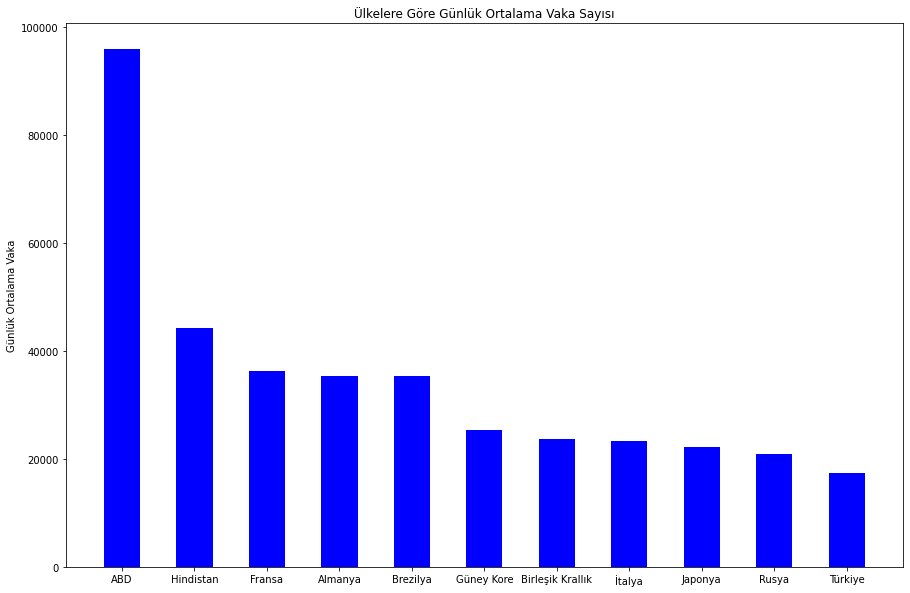

In [50]:
f=plt.figure(figsize=(15,10))
plt.bar(mean_data.ulke_ismi,mean_data.gunluk_ortalama_vaka_sayisi,width=0.5,color="b")
plt.ylabel("Günlük Ortalama Vaka")
plt.title("Ülkelere Göre Günlük Ortalama Vaka Sayısı")
plt.show()

**En yüksek ölüm oranına sahip ilk 10 ülke**

In [51]:
df2 = df.groupby(['location','continent'], as_index=False).max('date')
df2

,location,continent,total_cases,new_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,new_tests,people_vaccinated,gdp_per_capita,hospital_beds_per_thousand,population
0,Afghanistan,Asia,2.035740e+05,12296.947547,7826.0,4949.674000,695.081045,2.110457e+07,67285.412119,11165700.0,1803.987000,0.500000,41128772.0
1,Albania,Europe,4.532789e+06,12296.947547,3593.0,117174.081000,1264.109000,2.110457e+07,67285.412119,1339100.0,11803.431000,2.890000,2842318.0
2,Algeria,Africa,2.708620e+05,2521.000000,6881.0,6032.128000,695.081045,2.110457e+07,67285.412119,7840131.0,13913.839000,1.900000,44903228.0
3,Andorra,Europe,4.658800e+04,2313.000000,155.0,583495.109000,1941.310000,2.110457e+07,67285.412119,57898.0,19540.578573,3.088716,79843.0
4,Angola,Africa,1.031310e+05,5035.000000,1917.0,2897.834000,695.081045,2.110457e+07,67285.412119,14220830.0,5819.495000,3.088716,35588996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Wallis and Futuna,Oceania,3.415000e+03,2654.000000,7.0,294498.103000,695.081045,2.110457e+07,67285.412119,7136.0,19540.578573,3.088716,11596.0
231,Western Sahara,Africa,4.532789e+06,12296.947547,0.0,61398.023724,695.081045,3.943000e+03,67285.412119,0.0,19540.578573,3.088716,576005.0
232,Yemen,Asia,1.194500e+04,12296.947547,2159.0,354.487000,695.081045,2.110457e+07,67285.412119,914722.0,1479.147000,0.700000,33696612.0
233,Zambia,Africa,3.336850e+05,5555.000000,4017.0,16669.522000,695.081045,2.110457e+07,67285.412119,7540676.0,3689.251000,2.000000,20017670.0


In [52]:
#death_rate sütunu oluşturuldu
df2["death_rate"] = (df2.total_deaths / df2.total_cases)
df2

,location,continent,total_cases,new_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,new_tests,people_vaccinated,gdp_per_capita,hospital_beds_per_thousand,population,death_rate
0,Afghanistan,Asia,2.035740e+05,12296.947547,7826.0,4949.674000,695.081045,2.110457e+07,67285.412119,11165700.0,1803.987000,0.500000,41128772.0,0.038443
1,Albania,Europe,4.532789e+06,12296.947547,3593.0,117174.081000,1264.109000,2.110457e+07,67285.412119,1339100.0,11803.431000,2.890000,2842318.0,0.000793
2,Algeria,Africa,2.708620e+05,2521.000000,6881.0,6032.128000,695.081045,2.110457e+07,67285.412119,7840131.0,13913.839000,1.900000,44903228.0,0.025404
3,Andorra,Europe,4.658800e+04,2313.000000,155.0,583495.109000,1941.310000,2.110457e+07,67285.412119,57898.0,19540.578573,3.088716,79843.0,0.003327
4,Angola,Africa,1.031310e+05,5035.000000,1917.0,2897.834000,695.081045,2.110457e+07,67285.412119,14220830.0,5819.495000,3.088716,35588996.0,0.018588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Wallis and Futuna,Oceania,3.415000e+03,2654.000000,7.0,294498.103000,695.081045,2.110457e+07,67285.412119,7136.0,19540.578573,3.088716,11596.0,0.002050
231,Western Sahara,Africa,4.532789e+06,12296.947547,0.0,61398.023724,695.081045,3.943000e+03,67285.412119,0.0,19540.578573,3.088716,576005.0,0.000000
232,Yemen,Asia,1.194500e+04,12296.947547,2159.0,354.487000,695.081045,2.110457e+07,67285.412119,914722.0,1479.147000,0.700000,33696612.0,0.180745
233,Zambia,Africa,3.336850e+05,5555.000000,4017.0,16669.522000,695.081045,2.110457e+07,67285.412119,7540676.0,3689.251000,2.000000,20017670.0,0.012038


In [53]:
top_10_countries_highest_death_rate=df2.groupby('location', as_index=False).max('date').sort_values('death_rate', ascending = False).head(10)
top_10_countries_highest_death_rate

,location,total_cases,new_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,new_tests,people_vaccinated,gdp_per_capita,hospital_beds_per_thousand,population,death_rate
232,Yemen,11945.0,12296.947547,2159.0,354.487000,695.081045,2.110457e+07,67285.412119,914722.0,1479.147000,0.70,33696612.0,0.180745
202,Syria,57367.0,905.000000,3163.0,2592.830000,695.081045,2.110457e+07,67285.412119,3050850.0,19540.578573,1.50,22125242.0,0.055136
163,Peru,4161218.0,59470.000000,217069.0,122210.524000,6375.084000,2.897112e+07,67285.412119,29972259.0,12236.706000,1.60,34049588.0,0.052165
192,Somalia,27243.0,1066.000000,1361.0,1548.117000,695.081045,2.110457e+07,67285.412119,7137557.0,19540.578573,0.90,17597508.0,0.049958
59,Egypt,515645.0,5516.000000,24798.0,4645.865000,695.081045,2.110457e+07,67285.412119,53496777.0,10550.206000,1.60,110990096.0,0.048091
130,Mexico,7113658.0,109895.000000,330424.0,61398.023724,2591.477000,2.110457e+07,118363.000000,97179493.0,17336.469000,1.38,127504120.0,0.046449
25,Bosnia and Herzegovina,400043.0,5254.000000,16180.0,123717.114000,5003.819000,2.110457e+07,67285.412119,943394.0,11713.895000,3.50,3233530.0,0.040446
0,Afghanistan,203574.0,12296.947547,7826.0,4949.674000,695.081045,2.110457e+07,67285.412119,11165700.0,1803.987000,0.50,41128772.0,0.038443
115,Liberia,7996.0,12296.947547,294.0,1507.914000,695.081045,2.110457e+07,67285.412119,3692705.0,752.788000,0.80,5302690.0,0.036768
58,Ecuador,1009044.0,17670.000000,35934.0,56054.880000,1996.222000,2.110457e+07,67285.412119,15237333.0,10581.936000,1.50,18001002.0,0.035612


<AxesSubplot: title={'center': 'En Yüksek Ölüm Oranına Sahip 10 Ülke'}, xlabel='death_rate', ylabel='location'>

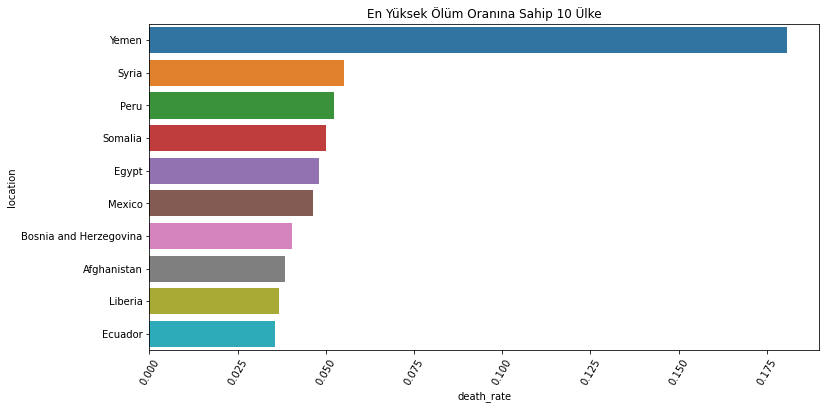

In [54]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=60)
plt.title("En Yüksek Ölüm Oranına Sahip 10 Ülke")
sns.barplot(data=top_10_countries_highest_death_rate, x="death_rate", y="location")

**Ülkelere göre aşılama sayısı**

In [55]:
vaccine_data = df.groupby(["location","continent"], as_index=False).max("date").sort_values("people_vaccinated", ascending = False).head(20)
vaccine_data

,location,continent,total_cases,new_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,new_tests,people_vaccinated,gdp_per_capita,hospital_beds_per_thousand,population
41,China,Asia,1053804.0,2.952000e+04,5226.0,739.051000,3.665000,9.214000e+09,6.728541e+04,1.303832e+09,15308.712,4.340000,1.425887e+09
93,India,Asia,44660579.0,4.141880e+05,530500.0,31513.848000,695.081045,8.585264e+08,3.585563e+07,1.026901e+09,6426.674,0.530000,1.417173e+09
221,United States,North America,97734261.0,1.355234e+06,1072582.0,288906.863000,3170.601000,9.127691e+08,3.201706e+06,2.664019e+08,54225.446,2.770000,3.382899e+08
94,Indonesia,Asia,6517630.0,6.471800e+04,158807.0,23657.344000,695.081045,5.950374e+07,3.582700e+05,2.043156e+08,11188.744,1.040000,2.755013e+08
27,Brazil,South America,34849063.0,2.871490e+05,688332.0,161852.658000,3196.883000,7.092322e+07,2.920329e+06,1.873975e+08,14103.452,2.200000,2.153135e+08
15,Bangladesh,Asia,2035782.0,1.623000e+04,29425.0,11892.197000,695.081045,2.110457e+07,6.728541e+04,1.418066e+08,3523.984,0.800000,1.711864e+08
157,Pakistan,Asia,1574321.0,1.207300e+04,30627.0,6675.806000,695.081045,2.888957e+07,6.800200e+04,1.395494e+08,5034.708,0.600000,2.358249e+08
102,Japan,Asia,22635975.0,2.609990e+05,47087.0,182619.325000,695.081045,5.350494e+07,1.329376e+06,1.042843e+08,39002.223,13.050000,1.239517e+08
130,Mexico,North America,7113658.0,1.098950e+05,330424.0,61398.023724,2591.477000,2.110457e+07,1.183630e+05,9.717949e+07,17336.469,1.380000,1.275041e+08
228,Vietnam,Asia,11505608.0,4.542120e+05,43165.0,117180.735000,695.081045,8.582435e+07,8.843470e+05,9.004450e+07,6171.884,2.600000,9.818686e+07


<AxesSubplot: title={'center': 'En Fazla Aşılı İnsan Sayısına Göre ülkeler'}, xlabel='people_vaccinated', ylabel='location'>

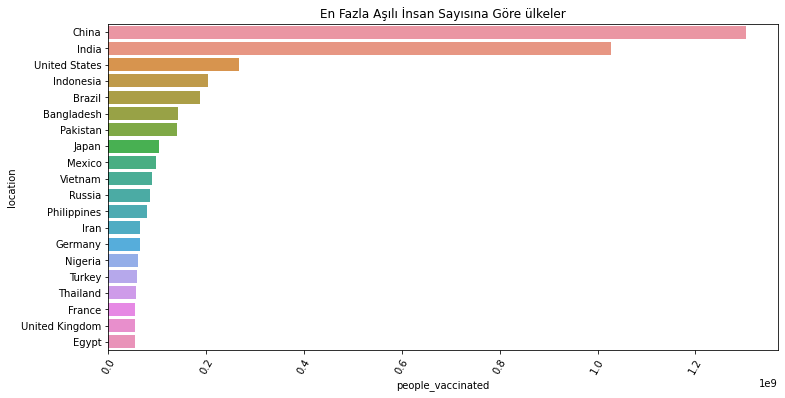

In [56]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=60)
plt.title("En Fazla Aşılı İnsan Sayısına Göre ülkeler")
sns.barplot(data=vaccine_data, x="people_vaccinated", y="location")

**En fazla hastane yatağı sayısına göre ülkeler**

In [57]:
bed_data = df.groupby(["location","continent"], as_index=False).max("date").sort_values("hospital_beds_per_thousand", ascending = False).head(20)
bed_data

,location,continent,total_cases,new_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,new_tests,people_vaccinated,gdp_per_capita,hospital_beds_per_thousand,population
133,Monaco,Europe,1.500500e+04,12296.947547,65.0,411197.282000,1781.261000,2.110457e+07,6.728541e+04,28875.0,19540.578573,13.800,36491.0
150,North Korea,Asia,4.532789e+06,12296.947547,6.0,61398.023724,695.081045,2.110457e+07,6.728541e+04,0.0,19540.578573,13.200,26069416.0
102,Japan,Asia,2.263598e+07,260999.000000,47087.0,182619.325000,695.081045,5.350494e+07,1.329376e+06,104284269.0,39002.223000,13.050,123951696.0
194,South Korea,Asia,2.583824e+07,621317.000000,29372.0,498655.526000,695.081045,1.002695e+08,1.154325e+06,45121967.0,35938.374000,12.270,51815808.0
17,Belarus,Europe,9.940370e+05,11170.000000,7118.0,104251.871000,746.516000,2.110457e+07,6.728541e+04,6512843.0,17167.967000,11.000,9534956.0
218,Ukraine,Europe,5.617767e+06,79325.000000,118068.0,141499.250000,2973.874000,2.110457e+07,1.131060e+05,15774300.0,7894.393000,8.800,39701744.0
171,Russia,Europe,2.115415e+07,202211.000000,382644.0,146179.703000,2644.152000,2.952448e+08,1.118115e+06,85926235.0,24765.954000,8.050,144713312.0
76,Germany,Europe,3.582377e+07,527487.000000,154535.0,429697.010000,1853.608000,1.312868e+08,6.728541e+04,64806317.0,45229.245000,8.000,83369840.0
30,Bulgaria,Europe,1.281155e+06,12399.000000,37916.0,188906.444000,5590.718000,2.110457e+07,7.552400e+04,2103303.0,18563.307000,7.454,6781955.0
214,Turkmenistan,Asia,4.532789e+06,12296.947547,0.0,61398.023724,695.081045,2.110457e+07,6.728541e+04,3728000.0,16389.023000,7.400,6430777.0


<AxesSubplot: title={'center': 'En Fazla Yatak Sayısına Sahip Ülkeler'}, xlabel='location', ylabel='hospital_beds_per_thousand'>

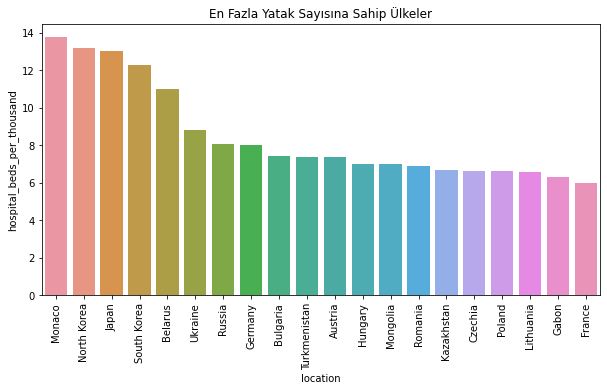

In [58]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("En Fazla Yatak Sayısına Sahip Ülkeler")
sns.barplot(data=bed_data, x="location", y="hospital_beds_per_thousand")